In [1]:
import pandas as pd 
import matplotlib.pyplot as plt

In [4]:
! pwd

/home/vbettachini/documents/universitet/FCEyN/maestríaDatos/economíaFinanzas/dmeyf2023/experimentos


In [6]:
# leer datos de experimentos con múltiples semillas
baseline_df = pd.read_csv('./exp_baseline_824_semillerioGanancias.csv')
feh2_df = pd.read_csv('./exp_all6_erste_824_semillerioGanancias.csv') # limitado a 15 iteraciones

In [8]:
# mean and std grouping by envios
baseline_envios_df = baseline_df.groupby('envios').agg({'ganancia': ['mean', 'std']})
feh2_envios_df = feh2_df.groupby('envios').agg({'ganancia': ['mean', 'std']})

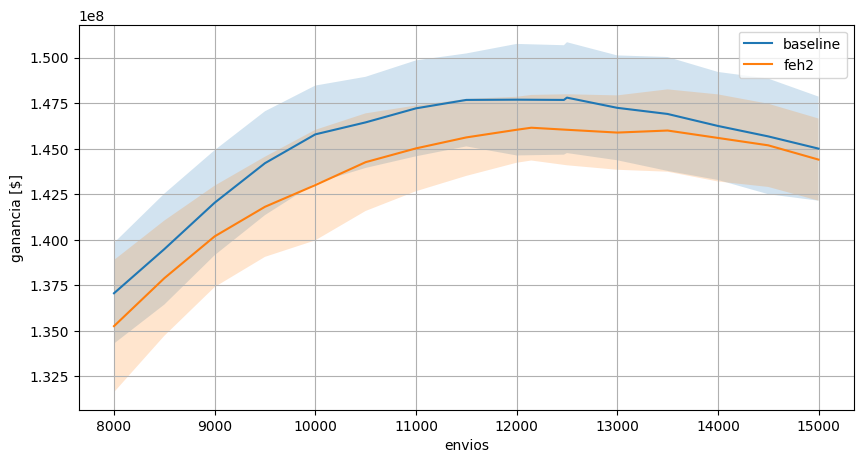

In [10]:
# plot mean and std of ganancia with std as confidence interval
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(baseline_envios_df.index, baseline_envios_df['ganancia']['mean'], label='baseline')
ax.fill_between(baseline_envios_df.index, baseline_envios_df['ganancia']['mean'] - baseline_envios_df['ganancia']['std'], baseline_envios_df['ganancia']['mean'] + baseline_envios_df['ganancia']['std'], alpha=0.2)
ax.plot(feh2_envios_df.index, feh2_envios_df['ganancia']['mean'], label='feh2')
ax.fill_between(feh2_envios_df.index, feh2_envios_df['ganancia']['mean'] - feh2_envios_df['ganancia']['std'], feh2_envios_df['ganancia']['mean'] + feh2_envios_df['ganancia']['std'], alpha=0.2)
ax.set_xlabel('envios')
ax.set_ylabel('ganancia [$]')
ax.legend()
ax.grid()
plt.show()

In [26]:
# all data with envios = 12000 in baseline
envios_max = 12000
baseline_ganancia_max = baseline_df[baseline_df['envios'] == envios_max]['ganancia']
feh2_ganancia_max = feh2_df[feh2_df['envios'] == envios_max]['ganancia']

In [48]:
import seaborn as sns

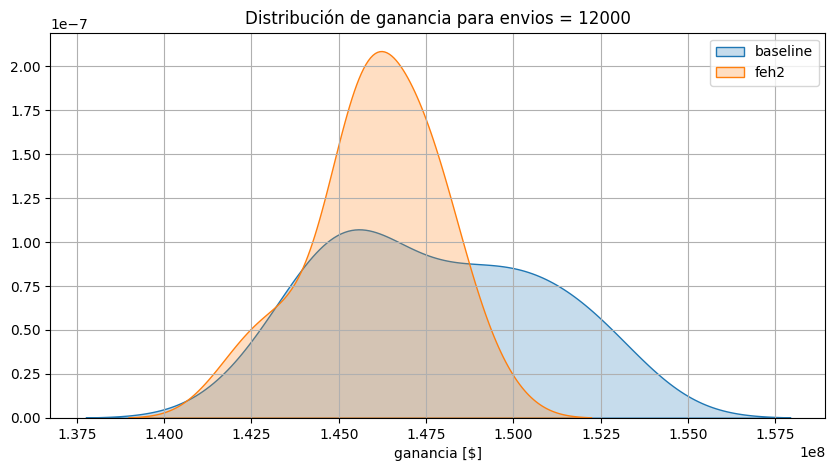

In [50]:
# the same as above but using seaborn and filling the area between the lines

fig, ax = plt.subplots(figsize=(10, 5))
sns.kdeplot(baseline_ganancia_max, fill = True, label='baseline', ax=ax)
sns.kdeplot(feh2_ganancia_max, fill = True, label='feh2', ax=ax)
ax.set_title('Distribución de ganancia para envios = 12000')
ax.set_xlabel('ganancia [$]')
ax.set_ylabel('')
ax.legend()
ax.grid()
plt.show()